In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
train_path = 'resources/Faces/train/'
celebs = [name for name in os.listdir(train_path)]
celebs

['Elton John', 'Madonna', 'Ben Afflek', 'Jerry Seinfield', 'Mindy Kaling']

In [12]:
haar_cascade = cv2.CascadeClassifier('resources/haarcascade_face.xml')

In [13]:
features = []
labels = []


In [26]:
def createTrainDataset():
    for celeb in celebs:
        celeb_path = os.path.join(train_path, celeb)
        label = celebs.index(celeb)
        
        for img in os.listdir(celeb_path):
            img_path = os.path.join(celeb_path, img)
            
            img_array = cv2.imread(img_path)
            gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            
            faces_rect = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=4)
            
            for (x, y, w, h) in faces_rect:
                faces_roi = gray_img[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)

In [27]:
createTrainDataset()

In [28]:
len(features), len(labels)

(100, 100)

In [29]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

In [32]:
features = np.array(features, dtype='object')
labels = np.array(labels)

In [33]:
face_recognizer.train(features, labels)

In [35]:
face_recognizer.save('models/face_recognizer.yml')

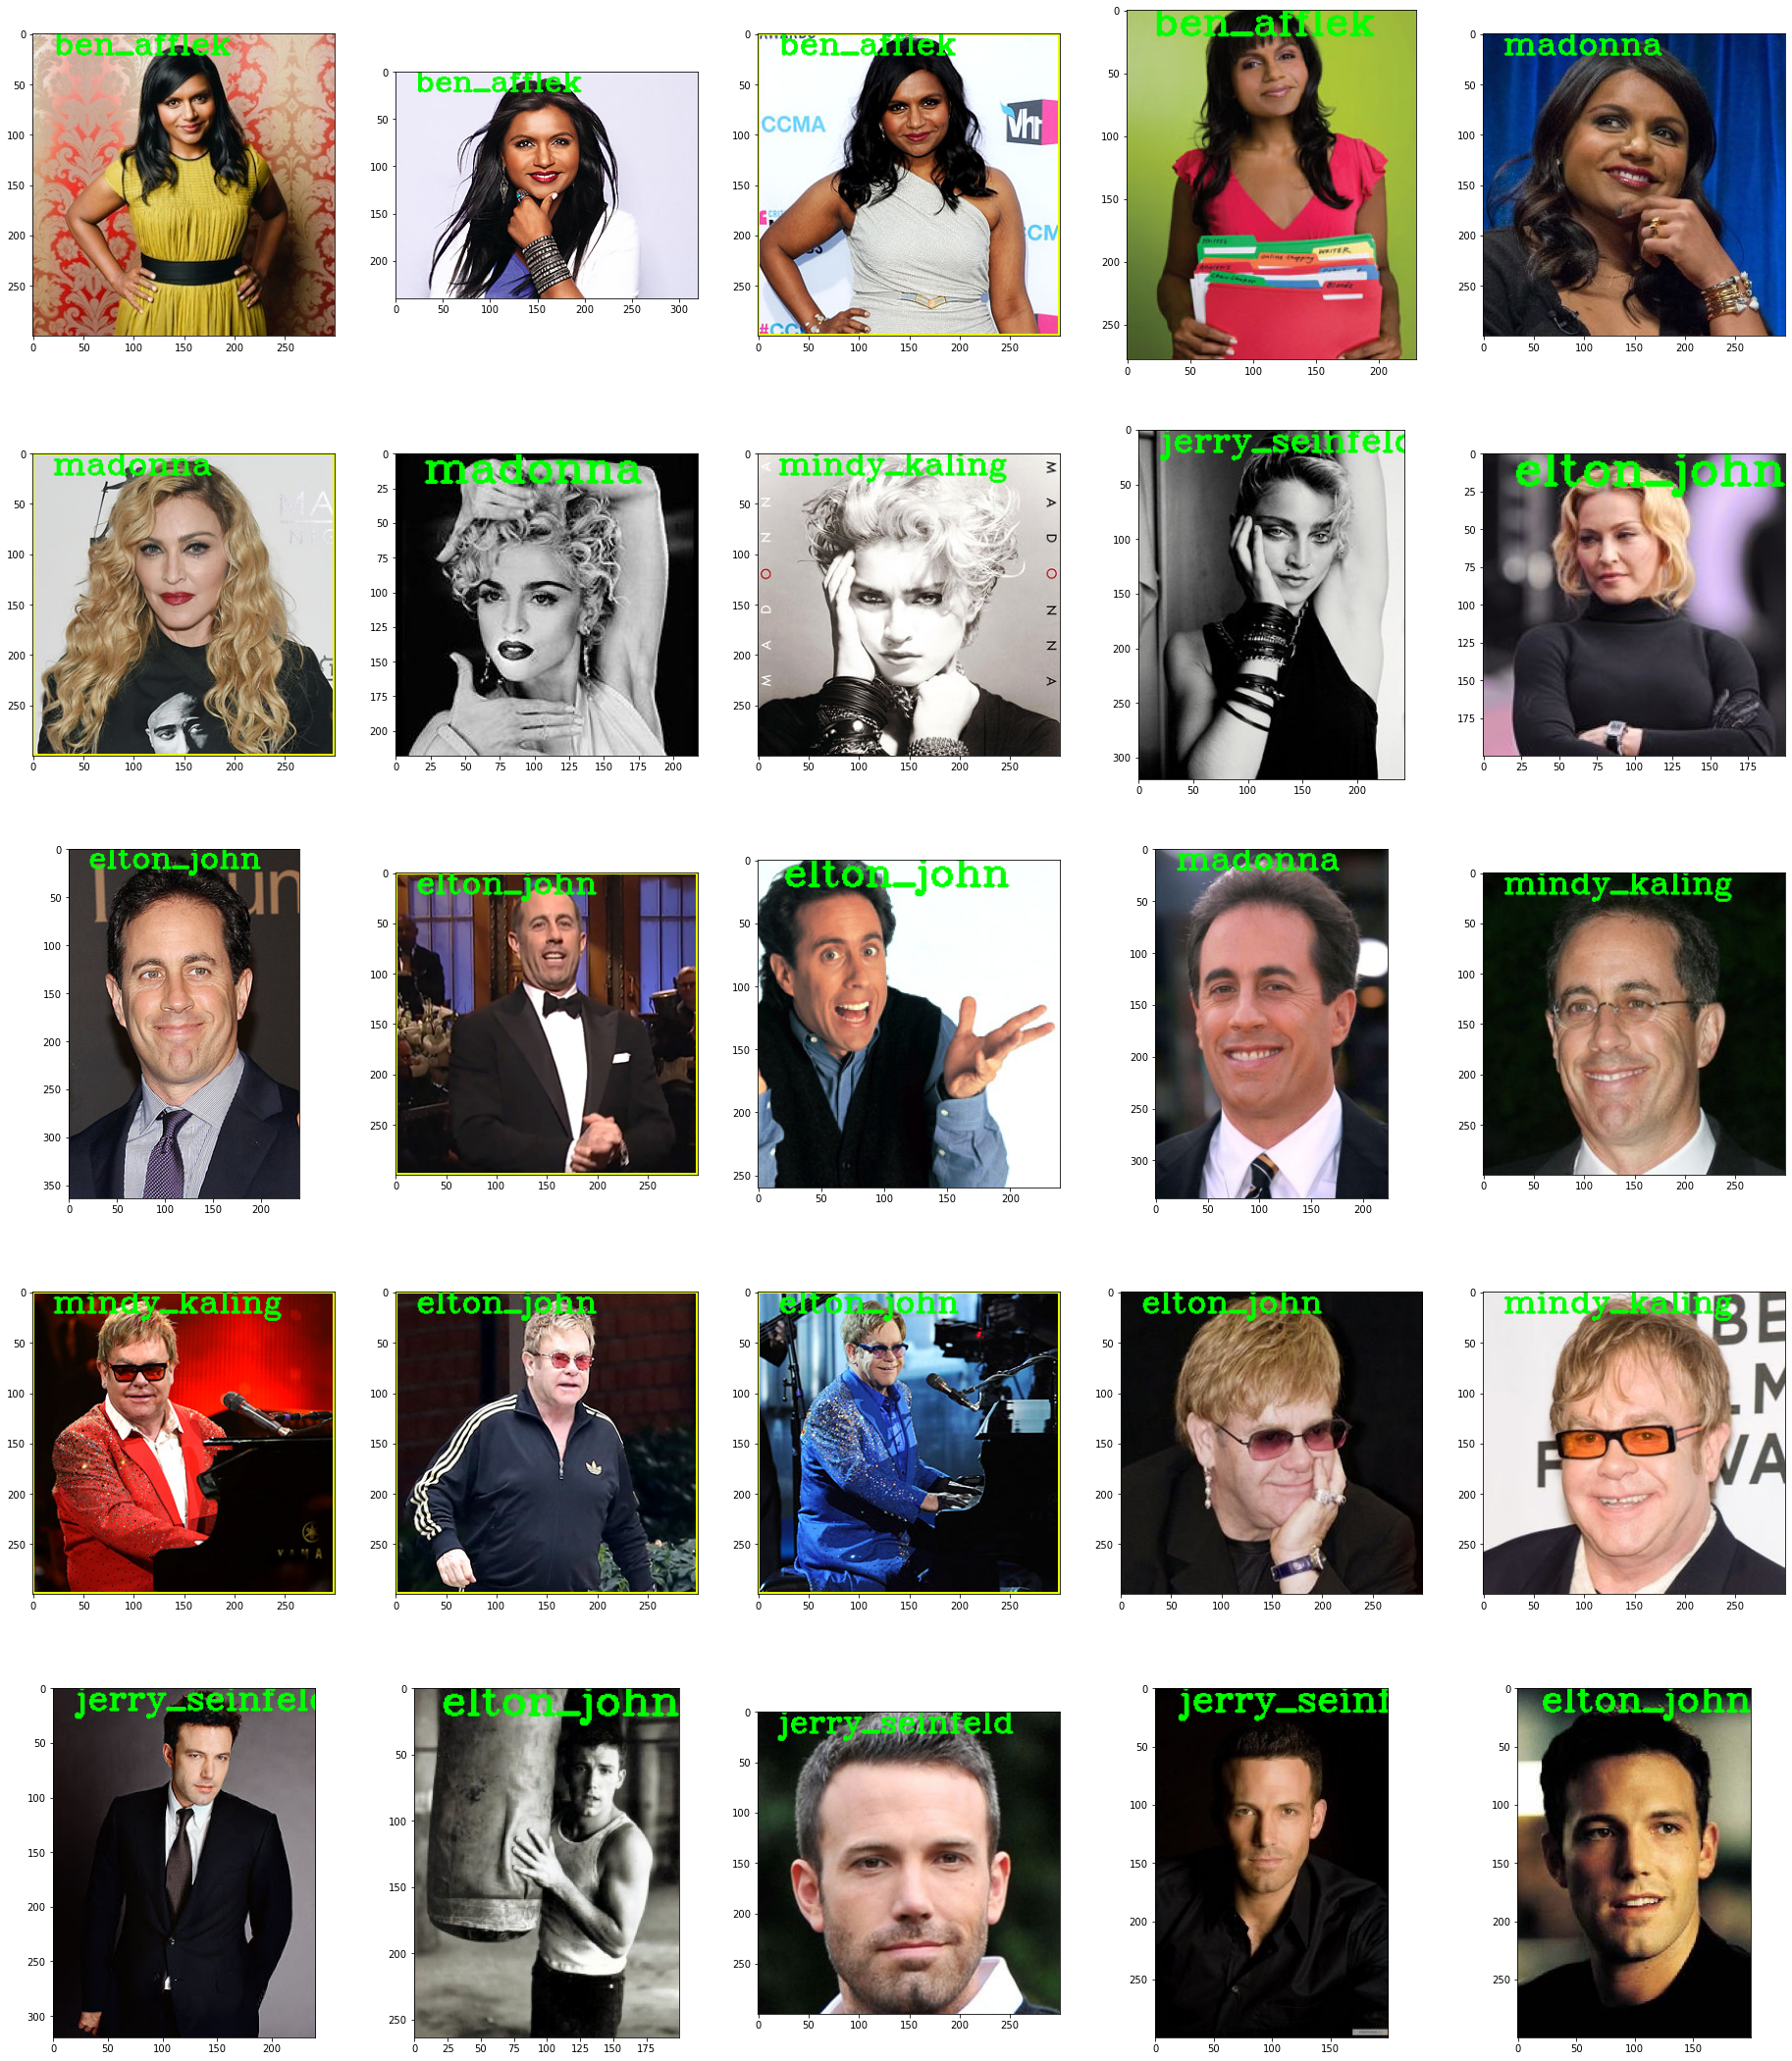

In [88]:
val_path = 'resources/Faces/val/'
celebs = [name for name in os.listdir(val_path)]
num_celeb = len(celebs)
row = 1
idx = 1
plt.figure(figsize=(32, 38))
for celeb in celebs:
    celeb_path = os.path.join(val_path, celeb)
    label = celebs.index(celeb)
    list_img_path = os.listdir(celeb_path)
    num_current_celeb_img = len(list_img_path)
    for img in list_img_path:
        img_path = os.path.join(celeb_path, img)
        
        img_array = cv2.imread(img_path)
        gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        
        faces_rect = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=4)
        plt.rcParams.update({'figure.max_open_warning': 0})
        for (x, y, w, h) in faces_rect:
            faces_roi = gray_img[y:y+h, x:x+w]
            label, confidence = face_recognizer.predict(faces_roi)
            cv2.putText(img_array, str(celebs[label]), (20, 20), cv2.FONT_HERSHEY_COMPLEX,
                        1.0, (0, 255, 0), thickness=2)
        plt.subplot(5, 5, idx)
        plt.imshow(img_array[...,::-1])
        idx +=1
    row += 1